# Мосташов Вячеслав Сергеевич Вариант 5
## Метеоритная защита земли
1. Определите местоположение появления метеорита с наибольшим количеством высвободившейся энергии.
2. Определите метеорит с максимальнойи минимальной скоростью.
3. Определите место максимальной концентрации метеоритов.
4. Определите время года, в которое вероятность появления метеоритов максимальна. Постройте график.
5. Удалите строки данных, в которых для метеоритов не указана скорость. Выведите размер набора данных до и после удаления.
6. Построить график, на котором по оси ОХ отложено время суток, по OY–частота появления метеоритов.
7. Заполните строки в которых для метеоритов не указана скорость.
8. Определите месяц года, для которого появление метеоритов наиболее вероятно (постройте необходимые графики).
9. Вычислите корреляцию Пирсона и Спирмена между признакамиAltitude и Total Radiated Energy. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv('cneos_fireball_data.csv')

In [66]:
df.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.19
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52


In [67]:
df.tail()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
714,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
715,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
716,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
717,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200
718,1988-04-15 03:03:10,4.1S,124.3E,NaN,NaN,NaN,NaN,NaN,7.580000e+12,14.000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Peak Brightness Date/Time (UT)       719 non-null    object 
 1   Latitude (deg.)                      539 non-null    object 
 2   Longitude (deg.)                     539 non-null    object 
 3   Altitude (km)                        307 non-null    float64
 4   Velocity (km/s)                      157 non-null    float64
 5   vx                                   157 non-null    float64
 6   vy                                   157 non-null    float64
 7   vz                                   157 non-null    float64
 8   Total Radiated Energy (J)            719 non-null    float64
 9   Calculated Total Impact Energy (kt)  719 non-null    float64
dtypes: float64(7), object(3)
memory usage: 56.3+ KB


In [69]:
df.describe()

,Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
count,307.000000,157.000000,157.000000,157.000000,157.000000,7.190000e+02,719.000000
mean,36.511726,17.950318,0.310828,-2.388535,-1.031847,8.812462e+11,1.387638
std,10.649462,6.057382,10.825425,11.415896,10.419010,1.405769e+13,16.598496
min,15.200000,9.800000,-35.400000,-43.500000,-28.700000,2.000000e+10,0.073000
25%,29.600000,13.700000,-7.300000,-11.200000,-9.100000,3.300000e+10,0.110000
50%,35.200000,16.900000,0.100000,-2.300000,0.300000,6.800000e+10,0.220000
75%,40.700000,19.800000,9.100000,4.800000,6.700000,1.510000e+11,0.440000
max,74.000000,49.000000,21.500000,25.800000,23.700000,3.750000e+14,440.000000


In [70]:
df.dropna()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52
5,2017-06-20 13:41:32,54.2S,133.0E,33.3,13.6,8.7,-5.7,8.8,6.360000e+11,1.60
...,...,...,...,...,...,...,...,...,...,...
450,2004-04-22 04:21:49,44.3S,83.3E,29.6,16.3,8.5,-12.1,-6.8,6.240000e+11,1.50
451,2004-04-06 03:24:49,12.0S,162.8E,35.0,25.6,10.5,-23.2,-2.9,4.330000e+11,1.10
462,2003-11-10 13:54:06,64.5S,136.2E,23.0,20.1,14.8,-8.7,10.4,5.180000e+11,1.30
467,2003-09-27 12:59:02,21.0N,86.6E,26.0,18.2,-1.0,-5.4,-17.3,2.150000e+12,4.60


In [71]:
df.drop_duplicates()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.190
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520
...,...,...,...,...,...,...,...,...,...,...
714,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
715,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
716,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
717,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


In [72]:
df.shape

(719, 10)

1. Определите местоположение появления метеорита с наибольшим количеством высвободившейся энергии.

In [73]:
df[df['Calculated Total Impact Energy (kt)'] == df['Calculated Total Impact Energy (kt)'].max()]

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
146,2013-02-15 03:20:33,54.8N,61.1E,23.3,18.6,12.8,-13.3,-2.4,3.750000e+14,440.0


2. Определите метеорит с максимальнойи минимальной скоростью.

In [74]:
df[df['Velocity (km/s)'] == df['Velocity (km/s)'].max()]

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
67,2015-07-04 01:40:11,38.6N,103.1E,46.3,49.0,0.9,-40.4,-27.7,5.600000e+10,0.18


In [75]:
df[df['Velocity (km/s)'] == df['Velocity (km/s)'].min()]

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
300,2008-07-01 17:40:19,37.1N,115.7W,36.1,9.8,2.8,1.7,-9.2,3.600000e+10,0.12


3. Определите место максимальной концентрации метеоритов.

In [76]:
def get_data(name):
    return name[-1]

In [77]:
df2 = df.dropna()
Latitude = df2['Latitude (deg.)'].apply(get_data)
Longitude = df2['Longitude (deg.)'].apply(get_data)

In [78]:
df.groupby([Latitude, Longitude])['Longitude (deg.)'].count()

Latitude (deg.)  Longitude (deg.)
N                E                   51
                 W                   24
S                E                   48
                 W                   32
Name: Longitude (deg.), dtype: int64

4. Определите время года, в которое вероятность появления метеоритов максимальна. Постройте график.

In [79]:
def get_data(name):
    return name.split('-')[1]
month = df['Peak Brightness Date/Time (UT)'].apply(get_data)
winter = month[(month == "01") | (month == "02") | (month == "12")].count()
spring = month[(month == "03") | (month == "04") | (month == "05")].count()
summer = month[(month == "06") | (month == "07") | (month == "08")].count()
autumn = month[(month == "09") | (month == "10") | (month == "11")].count()
s = pd.Series([winter, spring, summer, autumn], index = ['winter', 'spring', 'summer', 'autumn'])

In [80]:
s[s == s.max()]

autumn    182
dtype: int64

<AxesSubplot:>

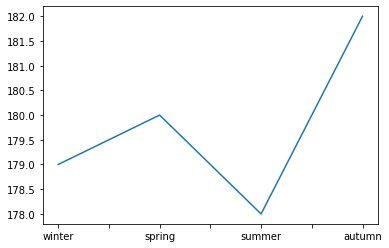

In [81]:
s.plot()

5. Удалите строки данных, в которых для метеоритов не указана скорость. Выведите размер набора данных до и после удаления.

In [82]:
df2 = df.dropna(axis = 0, subset=['Velocity (km/s)'])
df2.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52
5,2017-06-20 13:41:32,54.2S,133.0E,33.3,13.6,8.7,-5.7,8.8,6.360000e+11,1.60


In [83]:
df.shape

(719, 10)

In [84]:
df2.shape

(157, 10)

6. Построить график, на котором по оси ОХ отложено время суток, по OY–частота появления метеоритов.

In [85]:
def get_time(name):
    return name.split()[1].split(':')[0]

In [86]:
time = df['Peak Brightness Date/Time (UT)'].apply(get_time)

<AxesSubplot:xlabel='time'>

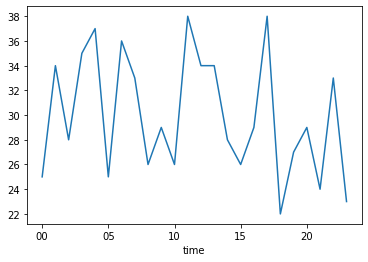

In [87]:
df.groupby(time)['Peak Brightness Date/Time (UT)'].count().plot(xlabel = "time")

7. Заполните строки в которых для метеоритов не указана скорость.

In [88]:
df3 = df.fillna(3)
df3

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-31 22:01:35,24.7N,118.5W,3.0,3.0,3.0,3.0,3.0,5.800000e+10,0.190
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520
...,...,...,...,...,...,...,...,...,...,...
714,1993-11-29 17:48:41,26.5N,78.3E,3.0,3.0,3.0,3.0,3.0,2.600000e+10,0.092
715,1993-10-31 03:39:27,51.3N,100.9W,3.0,3.0,3.0,3.0,3.0,4.000000e+10,0.130
716,1991-10-04 09:22:47,78.7N,6.3E,3.0,3.0,3.0,3.0,3.0,5.500000e+11,1.400
717,1990-10-01 03:51:47,7.5N,142.8E,3.0,3.0,3.0,3.0,3.0,2.500000e+12,5.200


8. Определите месяц года, для которого появление метеоритов наиболее вероятно (постройте необходимые графики).

In [89]:
def get_data(name):
    return name.split('-')[1]
month = df['Peak Brightness Date/Time (UT)'].apply(get_data)

In [90]:
m = max(df.groupby(month)['Peak Brightness Date/Time (UT)'].count())

In [91]:
arr = df.groupby(month)['Peak Brightness Date/Time (UT)'].count()
arr[arr == m]

Peak Brightness Date/Time (UT)
10    65
11    65
Name: Peak Brightness Date/Time (UT), dtype: int64

<AxesSubplot:xlabel='month'>

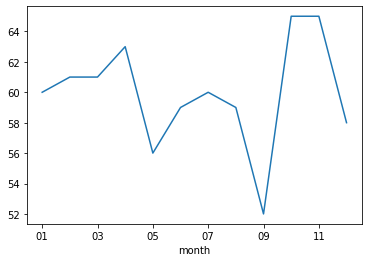

In [92]:
arr.plot(xlabel = "month")

9. Вычислите корреляцию Пирсона и Спирмена между признакамиAltitude и Total Radiated Energy. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [93]:
stats.pearsonr(df3['Altitude (km)'], df3['Total Radiated Energy (J)'])


(0.017731240985883606, 0.6350302745668643)

In [94]:
stats.spearmanr(df3['Altitude (km)'], df3['Total Radiated Energy (J)'])

SpearmanrResult(correlation=0.18476771782927462, pvalue=6.07590161701954e-07)

<AxesSubplot:ylabel='Frequency'>

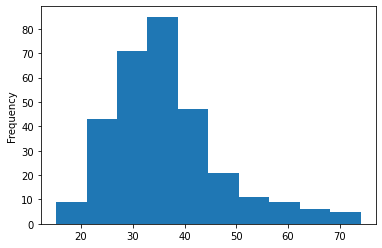

In [95]:
df['Altitude (km)'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

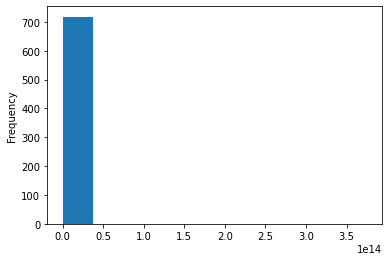

In [96]:
df['Total Radiated Energy (J)'].plot.hist()